In [45]:
import sklearn as skl
from sklearn import cluster
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
file_name="SynData1.txt"
file_path="/Users/ehsanmos/Documents/CS_courses_UNR/Fall2019/Data_mining/HW/HW4/"
in_file=file_path+file_name
input_array=np.loadtxt(in_file)

In [47]:
input_array.shape

(600, 2)

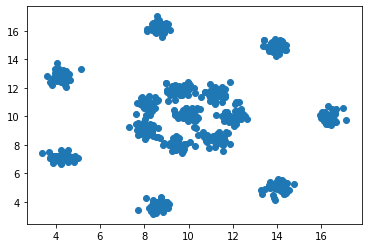

In [48]:
x_axis=input_array[:,0]
y_axis=input_array[:,1]
plt.scatter(x_axis,y_axis)

Text(0, 0.5, 'SSE')

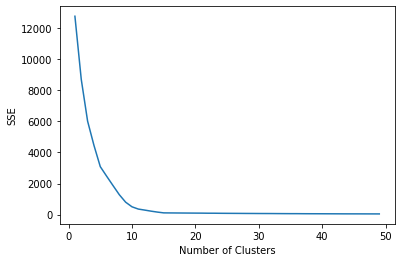

In [67]:
numClusters = range(1,50)
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k) # creates the K-means class
    k_means.fit(input_array) # Compute k-means clustering.
    SSE.append(k_means.inertia_) # what is inertia? samples of each cluster compared to its cluster? or all clusters? what sample? 

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

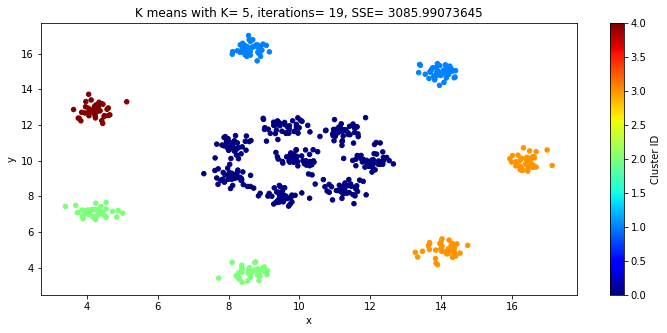

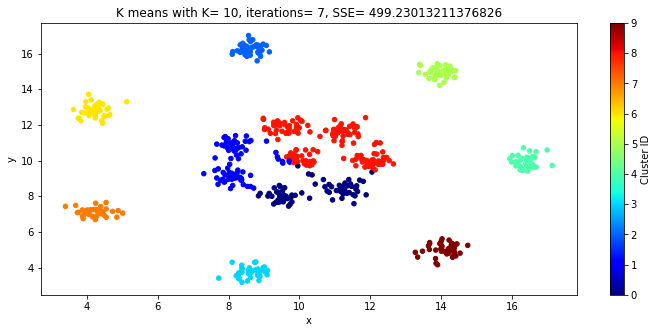

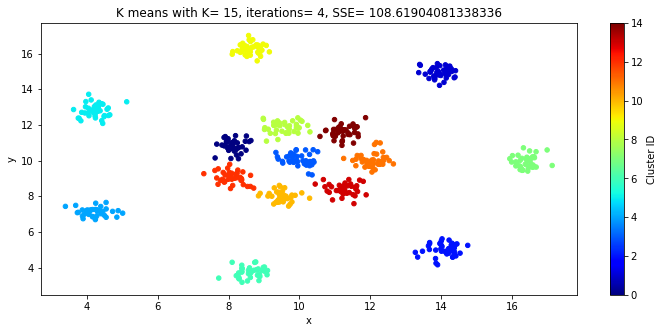

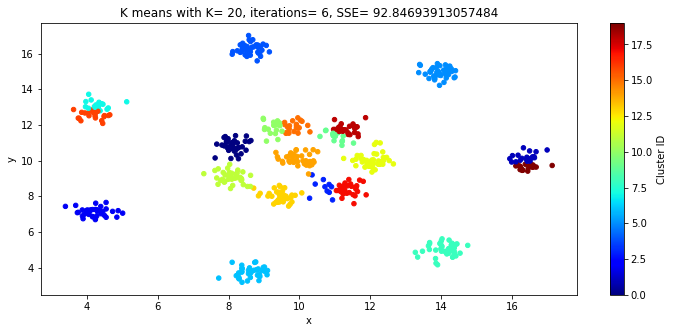

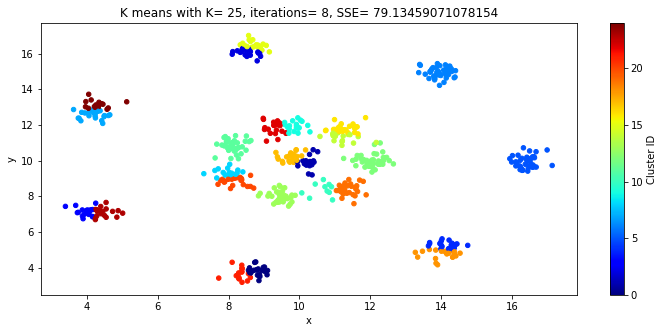

In [90]:
numClusters = [5,10,15,20,25]
SSE = []
no_iter= []
for k in numClusters:
    k_means = KMeans(n_clusters=k) # creates the K-means class
    k_means.fit(input_array) # Compute k-means clustering.
    SSE.append(k_means.inertia_) # what is inertia? samples of each cluster compared to its cluster? or all clusters? what sample?
    no_iter.append(k_means.n_iter_) # number of iterations until converge
    
    labels = pd.DataFrame(k_means.labels_, columns=['Cluster ID'])
    input_df = pd.DataFrame(input_array, columns=['x', 'y']) 
    result = pd.concat((input_df, labels), axis=1)
    
    fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
    result.plot.scatter(x='x',y='y', c='Cluster ID',colormap='jet',ax=ax1)
    ax1.set_title('K means with K= %s, iterations= %s, SSE= %s' %(k,k_means.n_iter_,k_means.inertia_) )

    
    
# print(no_iter)
# print(SSE)
    

# plt.scatter(no_iter, SSE)
# plt.xlabel('Number of Iterations')
# plt.ylabel('SSE')